#Improting Basic Libraries:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Netflix Dataset:-

In [2]:
Netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt', header=None, names=['Cust_Id','Rating'], usecols=[0,1])
Netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


#Analysing The Dataset:-

In [3]:
Netflix_dataset.tail(10)

,Cust_Id,Rating
24058253,272857,4.0
24058254,185372,1.0
24058255,2219917,3.0
24058256,1796454,1.0
24058257,2562830,4.0
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


####Finding Data Types of Each Column:-

In [4]:
Netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

####Finding The Shape Of The Dataset:-

In [5]:
Netflix_dataset.shape

(24058263, 2)

####Calculating Total Number Of Movie In The Dataset:-

In [7]:
Movie_count = Netflix_dataset.isnull().sum()
Movie_count = Movie_count['Rating']
print(f'Total number of movies in the dataset:', Movie_count)

Total number of movies in the dataset: 4499


####Calculating Total Number Of Customers In The Dataset:-

In [8]:
Customer_count = Netflix_dataset['Cust_Id'].nunique()
print(f' Total number of unique values in "Cust_Id" column:', Customer_count)

 Total number of unique values in "Cust_Id" column: 475257


####Note: nunique key will also consider the movie Id's in the "Cust_Id" column as unique value, so we need to substract total movie count in the column to get accurate number of customers.

In [9]:
Customer_count = Customer_count - Movie_count
print(f'Total number of customers in the dataset:', Customer_count)

Total number of customers in the dataset: 470758


####Calculating Total Number Of Rating Recieved:-

In [10]:
Rating_count = Netflix_dataset['Cust_Id'].count() - Movie_count
print(f'Total number of rating recieved:', Rating_count)

Total number of rating recieved: 24053764


####Finding Count Of Rating Each Stars Has Recieved:-

In [15]:
Stars = Netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
print(f'Rating Count For Each Stars:')
Stars

Rating Count For Each Stars:


,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


#Visualizing The Total Netflix Pool:-

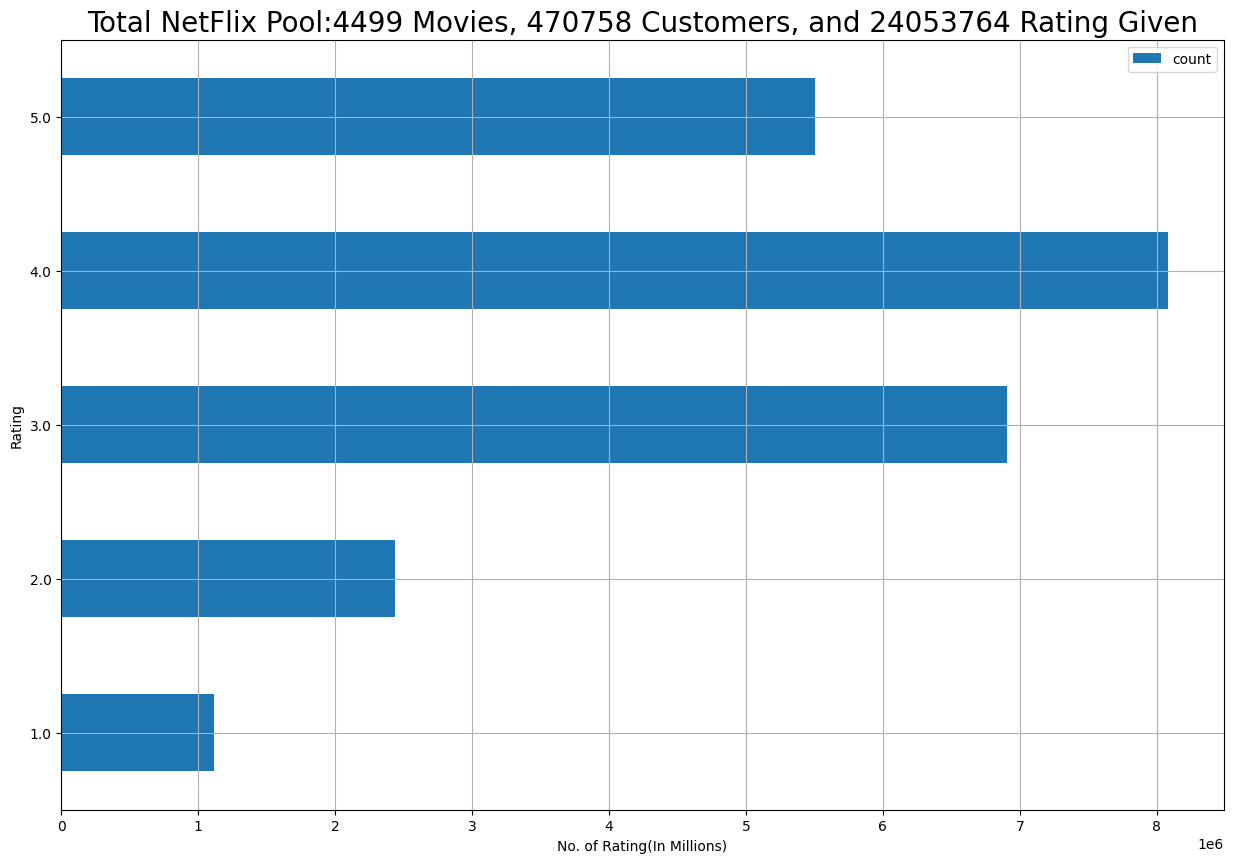

In [16]:
fig1 = Stars.plot(kind='barh', legend=True, figsize=(15,10))
plt.title(f'Total NetFlix Pool:{Movie_count} Movies, {Customer_count} Customers, and {Rating_count} Rating Given', fontsize=20)
plt.xlabel('No. of Rating(In Millions)')
plt.grid(True)

#Creating New DataFrame For Separating Movie_Id From "Cust_Id" Column:-

In [17]:
df_nan = pd.DataFrame(pd.isnull(Netflix_dataset.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [18]:
df_nan = df_nan[df_nan['Rating'] == True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


#Analyzing The New DataFrame:-

In [19]:
df_nan.shape

(4499, 1)

In [20]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [21]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [22]:
df_nan = df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


#Creating An Array Containing Movie_Id For Each Cust_Id:-

In [23]:
Movie_np = []
Movie_Id = 1
for i,j in zip (df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1), Movie_Id)
    Movie_np = np.append(Movie_np,temp)
    Movie_Id +=1
Last_records = np.full((1,len(Netflix_dataset)-df_nan.iloc[-1,0]-1), Movie_Id)
Movie_np = np.append(Movie_np,Last_records)

In [24]:
Movie_np

array([1.000e+00, 1.000e+00, 1.000e+00, ..., 4.499e+03, 4.499e+03,
       4.499e+03])

In [25]:
Movie_np.shape

(24053764,)

#Modifying The Netflix Dataset Using The New DataFrame:-

In [26]:
Netflix_dataset = Netflix_dataset[pd.notnull(Netflix_dataset['Rating'])]
Netflix_dataset['Movie_Id'] = Movie_np.astype(int)
Netflix_dataset['Cust_Id'] = Netflix_dataset['Cust_Id'].astype(int)
print(f'Now The Dataset will Look Like:')
Netflix_dataset

<ipython-input-26-1a62ac75f995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_dataset['Movie_Id'] = Movie_np.astype(int)


Now The Dataset will Look Like:


<ipython-input-26-1a62ac75f995>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_dataset['Cust_Id'] = Netflix_dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [27]:
Netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [28]:
Netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [29]:
Netflix_dataset.dtypes

Cust_Id       int64
Rating      float64
Movie_Id      int64
dtype: object

#Calculating The Total Number Of Rating Received For Each Movie:-

In [30]:
Movie_summary = Netflix_dataset.groupby('Movie_Id')['Rating'].agg(['count'])
Movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


#Setting Number Of Rating Benchmark For Each Movie:-

In [31]:
Movie_benchmark = round(Movie_summary['count'].quantile(0.7),0)
Movie_benchmark

1799.0

#Creating A Drop List For The Movies Received less Rating Then The Benchmark:-

In [32]:
Drop_movie_list = Movie_summary[Movie_summary['count']<Movie_benchmark].index
print(Drop_movie_list)

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)


#Calculating Number Of Rating Each Customer Has Given:-

In [33]:
Customer_summary = Netflix_dataset.groupby('Cust_Id')['Rating'].agg(['count'])
Customer_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


#Setting Number Of Rating Benchmark For Each Customer:-

In [34]:
Customer_benchmark = round(Customer_summary['count'].quantile(0.7),0)
Customer_benchmark

52.0

#Creating A Drop List For The Customers Given less Rating Then The Benchmark:-

In [35]:
Drop_customer_list = Customer_summary[Customer_summary['count']<Customer_benchmark].index
Drop_customer_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

#Finding Shape Of Original Dataset:-

In [36]:
print('The Original Dataframe has:', Netflix_dataset.shape, 'Data Points')

The Original Dataframe has: (24053764, 3) Data Points


#Shape Of The Dataset After Removing Datapoints Below The Benchmark:-

In [37]:
Netflix_dataset = Netflix_dataset[~Netflix_dataset['Movie_Id'].isin(Drop_movie_list)]
Netflix_dataset = Netflix_dataset[~Netflix_dataset['Cust_Id'].isin(Drop_customer_list)]
print('After Removing The Data points below the benchmark, the dataframe has :{}'.format(Netflix_dataset.shape))

After Removing The Data points below the benchmark, the dataframe has :(17337458, 3)


In [38]:
Netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [39]:
Netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496
24056846,293198,3.0,4496


#Importing Netflix Movie Dataset:-

In [40]:
Movie_dataset = pd.read_csv('/content/drive/MyDrive/movie_titles.csv', encoding='ISO-8859-1', usecols=[0,1,2], names=['Movie_Id', 'Year', 'Movie Name'])
Movie_dataset

,Movie_Id,Year,Movie Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


#Resetting Movie_Id As New Index For Movie_Dataset:-

In [41]:
Movie_dataset.set_index('Movie_Id', inplace=True)
Movie_dataset.head(10)

,Year,Movie Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


#Installing SCIKIT-SURPRISE Library:-

In [42]:
!pip install scikit-surprise
import surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357256 sha256=94788081deda000c65cb8c7306b11ab3951f70654d428b5085cbe44707d45a11
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


#Importing Required Libraries For Model Creation:-

In [43]:
import math
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

####Creating Object For "Reader" Class:-

In [44]:
reader = Reader()

####Using Reader Object To Load Data:-

In [45]:
data = Dataset.load_from_df(Netflix_dataset, reader)
data

####Creating An SVD Model Instance And Performing Cross Validation:-

In [46]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)

{'test_rmse': array([2641.40035702, 2641.07320304, 2642.75664045]),
 'test_mae': array([2297.49806364, 2296.99890693, 2298.85245465]),
 'fit_time': (340.00411009788513, 344.89586329460144, 344.17077708244324),
 'test_time': (151.5196225643158, 121.02178716659546, 137.6527817249298)}

In [47]:
Netflix_dataset.head(10)

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
701,439011,1.0,3
703,1644750,3.0,3
704,2031561,4.0,3
705,616720,4.0,3
706,2467008,4.0,3


####Creating Dataset For User "1331154":-

In [48]:
Dataset_1331154 = Netflix_dataset[(Netflix_dataset['Cust_Id'] == '1331154') & (Netflix_dataset['Rating']==5)]
Dataset_1331154

,Cust_Id,Rating,Movie_Id


In [49]:
Movie_dataset.head(10)

,Year,Movie Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


####Now We Will Make A Shallow Copy Of The Movie_Dataset File For User "1331154", So That we Can Make Change In The Copied Dataset And Not In The Actual Dataset:-

In [50]:
Movie_1331154 = Movie_dataset.copy()
Movie_1331154

,Year,Movie Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [51]:
Movie_1331154 = Movie_1331154.reset_index()
Movie_1331154

,Movie_Id,Year,Movie Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


####Filtering Out Movies Based On Drop_movie_list For User "1331154":-

In [52]:
Movie_1331154 = Movie_1331154[~Movie_1331154['Movie_Id'].isin(Drop_movie_list)]
Movie_1331154

,Movie_Id,Year,Movie Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


#Predicting Rating For User "1331154":-

In [53]:
Movie_1331154['Estimate_Score'] = Movie_1331154['Movie_Id'].apply(lambda x: svd.predict(1331154, x).est)
Movie_1331154 = Movie_1331154.drop('Movie_Id', axis=1)
Movie_1331154

<ipython-input-53-9b227bc3a777>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_1331154['Estimate_Score'] = Movie_1331154['Movie_Id'].apply(lambda x: svd.predict(1331154, x).est)


,Year,Movie Name,Estimate_Score
2,1997.0,Character,5
7,2004.0,What the #$*! Do We Know!?,5
15,1996.0,Screamers,5
16,2005.0,7 Seconds,5
17,1994.0,Immortal Beloved,5
...,...,...,...
17765,2002.0,Where the Wild Things Are and Other Maurice Se...,5
17766,2004.0,Fidel Castro: American Experience,5
17767,2000.0,Epoch,5
17768,2003.0,The Company,5


####Sorting The Recommendation On The Basis Of Estimated Score:-

In [54]:
Movie_1331154 = Movie_1331154.sort_values(by='Estimate_Score', ascending=False)
print(Movie_1331154)

         Year                          Movie Name  Estimate_Score
2      1997.0                           Character               5
12888  1975.0                 Race with the Devil               5
12890  2003.0                        24: Season 3               5
12891  1995.0                               Smoke               5
12892  2004.0                Driving Miss Wealthy               5
...       ...                                 ...             ...
8026   1980.0                              Gloria               5
8027   1993.0                    White Lotus Cult               5
8028   2004.0  Dora the Explorer: Catch the Stars               5
8029   2004.0                              Denied               5
17769  2003.0                        Alien Hunter               5

[14621 rows x 3 columns]


#Top 10 Recommended Movies For User "1331154":-

In [55]:
Movie_1331154.head(10)

,Year,Movie Name,Estimate_Score
2,1997.0,Character,5
12888,1975.0,Race with the Devil,5
12890,2003.0,24: Season 3,5
12891,1995.0,Smoke,5
12892,2004.0,Driving Miss Wealthy,5
12893,1960.0,The Time Machine,5
12894,1997.0,Ivanhoe,5
12895,1994.0,Bullets Over Broadway,5
12896,2002.0,Unspeakable,5
12897,1989.0,Fright Night Part II,5
